In [24]:
using DataFrames, CSV, Statistics, Plots, Polynomials, StatPlots

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1189
┌ Info: Precompiling IterableTables [1c8ee90f-4401-5389-894e-7a04a3dc0f4d]
└ @ Base loading.jl:1189
┌ Info: Precompiling Widgets [cc8bc4a8-27d6-5769-a93b-9d913e69aa62]
└ @ Base loading.jl:1189
┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1189
┌ Info: Precompiling KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]
└ @ Base loading.jl:1189


In [22]:
using Pkg

In [23]:
Pkg.add("StatPlots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed StatPlots ────────────── v0.8.1
 Installed DiffResults ──────────── v0.0.3
 Installed Rmath ────────────────── v0.5.0
 Installed FFTW ─────────────────── v0.2.4
 Installed URIParser ────────────── v0.4.0
 Installed PositiveFactorizations ─ v0.2.1
 Installed Optim ────────────────── v0.17.1
 Installed Distributions ────────── v0.16.4
 Installed TableTraitsUtils ─────── v0.3.1
 Installed Distances ────────────── v0.7.3
 Installed LineSearches ─────────── v7.0.0
 Installed NLSolversBase ────────── v7.1.1
 Installed Parameters ───────────── v0.10.1
 Installed StatsFuns ────────────── v0.7.0
 Installed SpecialFunctions ─────── v0.7.2
 Installed OffsetArrays ─────────── v0.8.1
 Installed BinDeps ──────────────── v0.8.10
 Installed ForwardDiff ──────────── v0.10.1
 I

In [33]:
Pkg.add("CSV")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>                                 ]  16.4 % %>                    ]  49.2 %===========================>             ]  65.6 %81.9 %=======================================> ]  97.1 % Resolving package versions...
 Installed Parsers ─ v0.2.11
 Installed MbedTLS ─ v0.6.6
 Installed CSV ───── v0.4.2
  Updating `~/.julia/environments/v1.0/Project.toml`
  [336ed68f] + CSV v0.4.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [336ed68f] + CSV v0.4.2
  [739be429] ↑ MbedTLS v0.6.5 ⇒ v0.6.6
  [69de0a69] + Parsers v0.2.11
  [9abbd945] + Profile 
  Building MbedTLS → `~/.julia/packages/MbedTLS/r1Ufc/deps/build.log`


In [4]:
julia_data = CSV.read("julia-times2.csv", delim=",")
c_data_O0 = CSV.read("c-times-O0.csv", delim=",")
c_data_O3 = CSV.read("c-times-O3.csv", delim=",")

,func,size,time
,String⍰,Int64⍰,Float64⍰
1,C naive -O3,500,0.255501
2,C naive -O3,500,0.246011
3,C naive -O3,500,0.247972
4,C naive -O3,500,0.243048
5,C naive -O3,500,0.25561
6,C naive -O3,500,0.243283
7,C naive -O3,500,0.25048
8,C naive -O3,500,0.258788
9,C naive -O3,500,0.256035


In [17]:
j_df = by(julia_data, [:func, :size]) do group
   DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time]))) 
end
c0_df = by(c_data_O0, [:func, :size]) do group
   DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time]))) 
end
c3_df = by(c_data_O3, [:func, :size]) do group
   DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time]))) 
end

,func,size,time_mean,time_stddev
,String⍰,Int64⍰,Float64,Float64
1,C naive -O3,500,0.251333,0.00591558
2,C naive -O3,750,1.19624,0.0480533
3,C naive -O3,1000,2.48919,0.0028411
4,C better -O3,500,0.207286,0.00207635
5,C better -O3,750,0.717575,0.000967673
6,C better -O3,1000,1.70326,0.00387817
7,C blas -O3,500,0.400946,0.00309988
8,C blas -O3,750,1.38251,0.00596573
9,C blas -O3,1000,3.30413,0.0121229


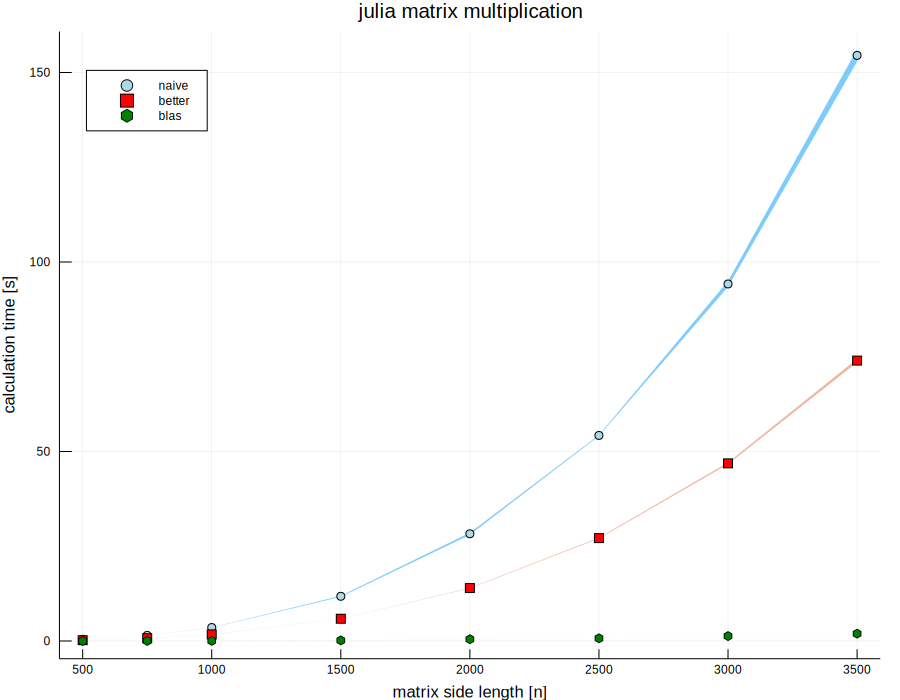

In [94]:
j_plot_naive = scatter(
    title = "julia matrix multiplication",
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    ribbon = j_df[j_df[:func].== "julia naive", :][:time_stddev],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

j_plot_better = scatter!(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    ribbon = j_df[j_df[:func].== "julia better", :][:time_stddev],
    markershape = :square,
    markercolor = :red,
    label = "better")

j_plot_blas = scatter!(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    ribbon = j_df[j_df[:func].== "julia blas", :][:time_stddev],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")

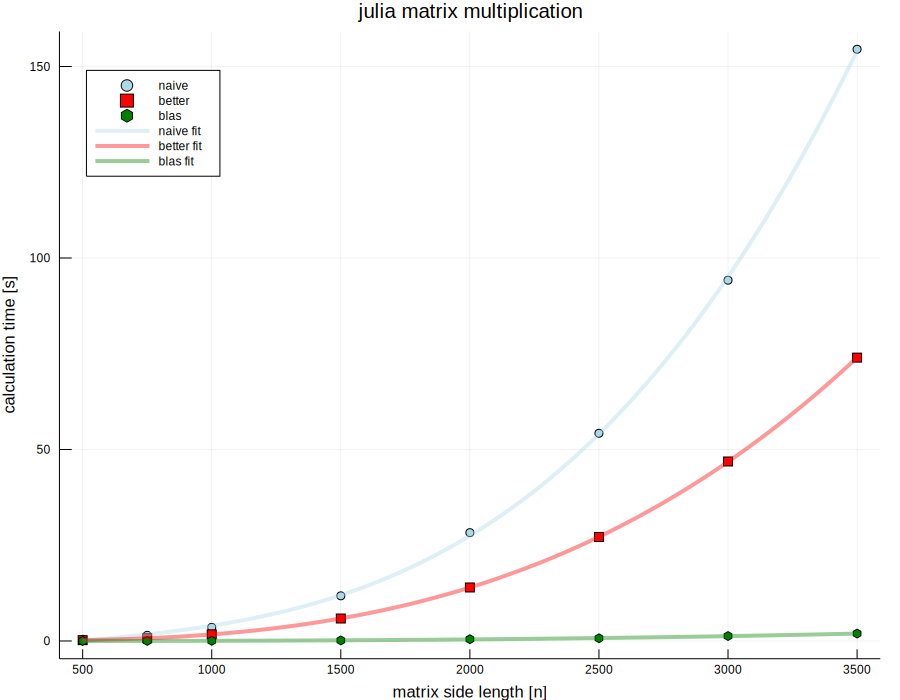

In [111]:
j_plot_naive = scatter(
    title = "julia matrix multiplication",
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

j_plot_better = scatter!(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "better")

j_plot_blas = scatter!(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")



j_fit_naive = polyfit(
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    3)

j_fit_better = polyfit(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    3)

j_fit_blas = polyfit(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(j_fit_naive, r),
    label = "naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_better, r),
    label = "better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_blas, r),
    label = "blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)

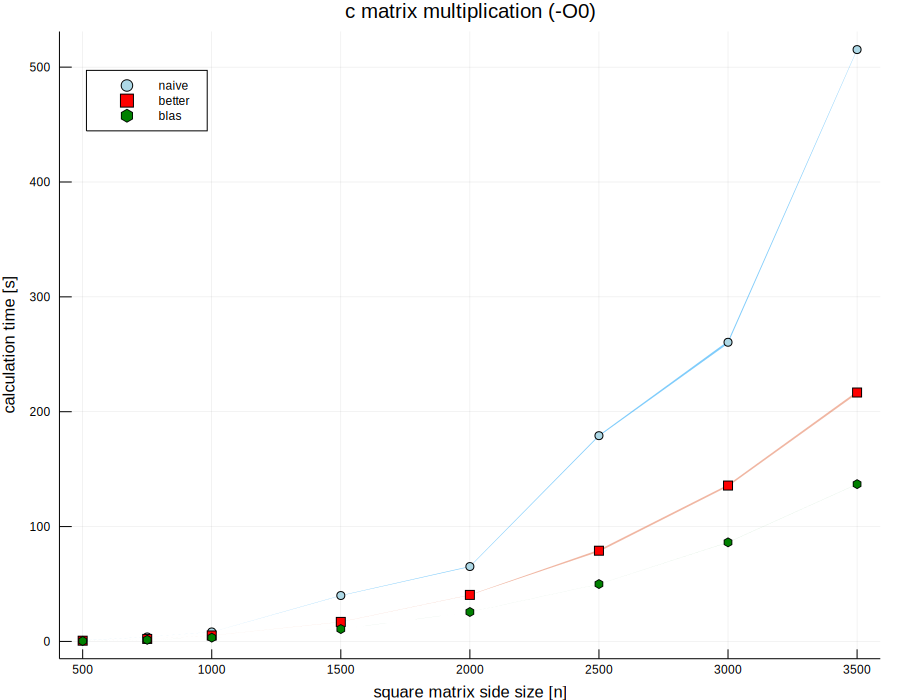

In [56]:
c0_plot_naive = scatter(
    title = "c matrix multiplication (-O0)",
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    ribbon = c0_df[c0_df[:func].== "C naive -O0", :][:time_stddev],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c0_plot_better = scatter!(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    ribbon = c0_df[c0_df[:func].== "C better -O0", :][:time_stddev],
    markershape = :square,
    markercolor = :red,
    label = "better")

c0_plot_blas = scatter!(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    ribbon = c0_df[c0_df[:func].== "C blas -O0", :][:time_stddev],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")

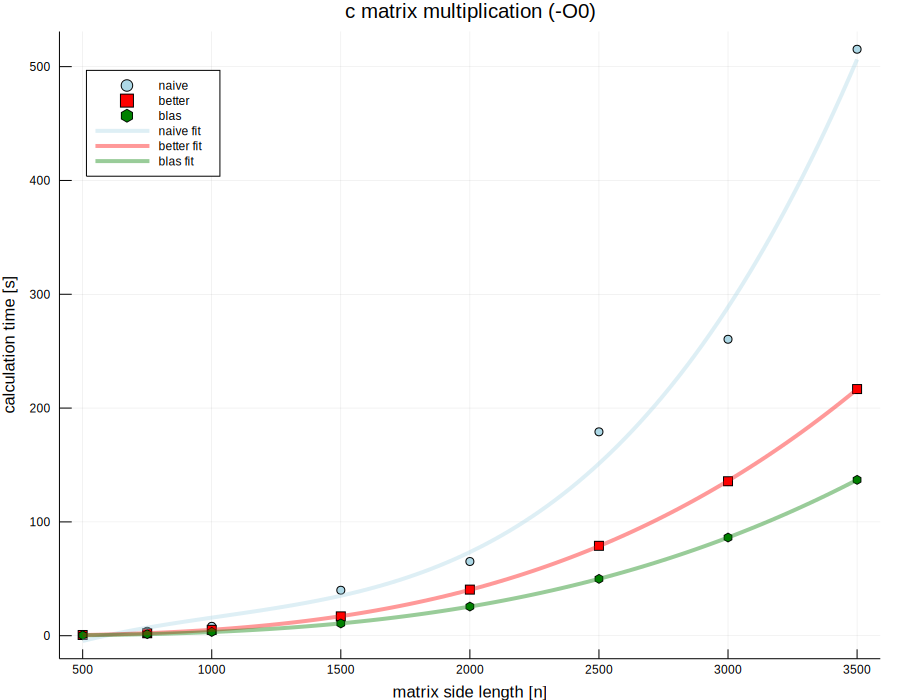

In [107]:
c0_plot_naive = scatter(
    title = "c matrix multiplication (-O0)",
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c0_plot_better = scatter!(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "better")

c0_plot_blas = scatter!(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")


c0_fit_naive = polyfit(
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    3)

c0_fit_better = polyfit(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    3)

c0_fit_blas = polyfit(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c0_fit_naive, r),
    label = "naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_better, r),
    label = "better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_blas, r),
    label = "blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)

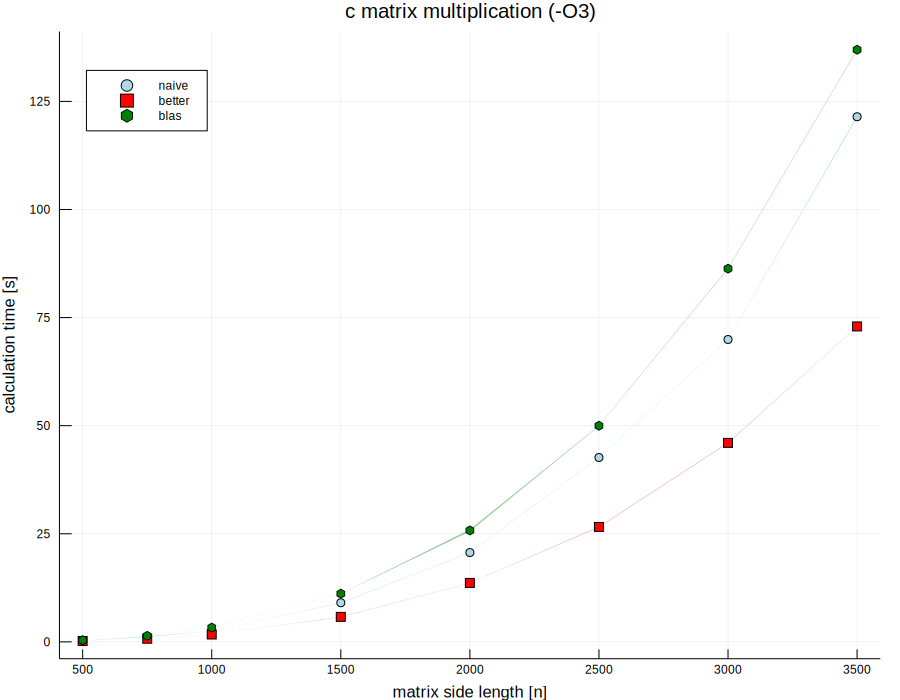

In [63]:
c3_plot_naive = scatter(
    title = "c matrix multiplication (-O3)",
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    ribbon = c3_df[c3_df[:func].== "C naive -O3", :][:time_stddev],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c3_plot_better = scatter!(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    ribbon = c3_df[c3_df[:func].== "C better -O3", :][:time_stddev],
    markershape = :square,
    markercolor = :red,
    label = "better")

c3_plot_blas = scatter!(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    ribbon = c3_df[c3_df[:func].== "C blas -O3", :][:time_stddev],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")

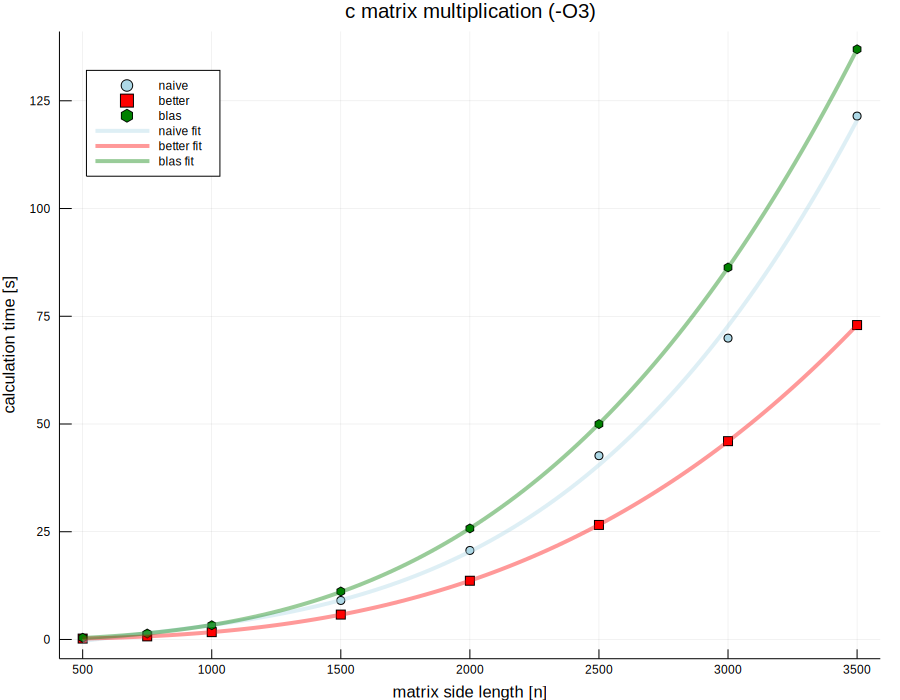

In [114]:
c3_plot_naive = scatter(
    title = "c matrix multiplication (-O3)",
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c3_plot_better = scatter!(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "better")

c3_plot_blas = scatter!(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")



c3_fit_naive = polyfit(
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    3)

c3_fit_better = polyfit(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    3)

c3_fit_blas = polyfit(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c3_fit_naive, r),
    label = "naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_better, r),
    label = "better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_blas, r),
    label = "blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)